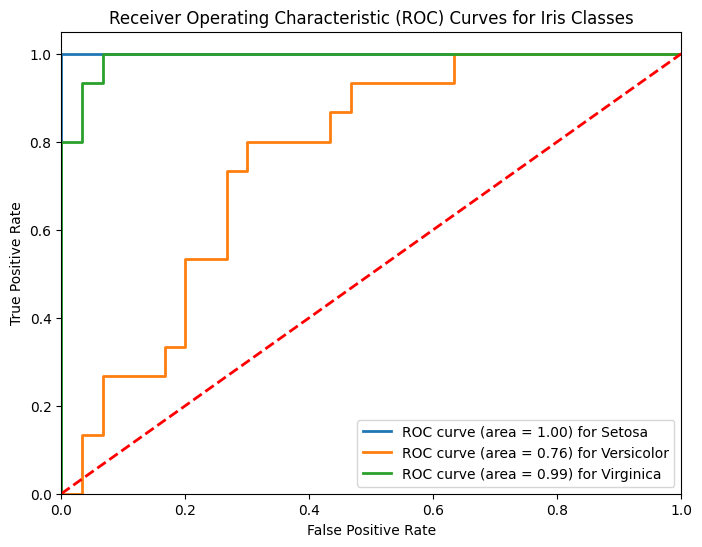

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import pandas as pd

# Cargar el conjunto de datos iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjunto de entrenamiento y prueba
# Dividir los datos en conjunto de entrenamiento y prueba de manera estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo para la clase Setosa
model_setosa = LogisticRegression(random_state=42, max_iter=1000)
model_setosa.fit(X_train, y_train == 0)

# Entrenar un modelo para la clase Versicolor
model_versicolor = LogisticRegression(random_state=42, max_iter=1000)
model_versicolor.fit(X_train, y_train == 1)

# Entrenar un modelo para la clase Virginica
model_virginica = LogisticRegression(random_state=42, max_iter=1000)
model_virginica.fit(X_train, y_train == 2)


#model_versicolor = LogisticRegression(random_state=42, max_iter=1000)
#model_virginica = LogisticRegression(random_state=42, max_iter=1000)

# Filtrar los datos para cada clase
# Filtrar los datos para la clase Setosa y convertirlos en un DataFrame
#X_train_setosa = pd.DataFrame(X_train[y_train == 0], columns=iris.feature_names)
#X_train_versicolor = pd.DataFrame(X_train[y_train == 1], columns=iris.feature_names)
#X_train_virginica = pd.DataFrame(X_train[y_train == 2], columns=iris.feature_names)

# Entrenar los modelos para cada clase
#model_setosa.fit(X_train_setosa, y_train[y_train == 0])
#model_versicolor.fit(X_train_versicolor, y_train[y_train == 1])
#model_virginica.fit(X_train_virginica, y_train[y_train == 2])

# Calcular las probabilidades de predicción para cada clase en los datos de prueba
y_prob_setosa = model_setosa.predict_proba(X_test)[:, 1]
y_prob_versicolor = model_versicolor.predict_proba(X_test)[:, 1]
y_prob_virginica = model_virginica.predict_proba(X_test)[:, 1]

# Calcular las curvas ROC y los AUC para cada clase
fpr_setosa, tpr_setosa, _ = roc_curve(y_test, y_prob_setosa, pos_label=0)
fpr_versicolor, tpr_versicolor, _ = roc_curve(y_test, y_prob_versicolor, pos_label=1)
fpr_virginica, tpr_virginica, _ = roc_curve(y_test, y_prob_virginica, pos_label=2)

auc_setosa = auc(fpr_setosa, tpr_setosa)
auc_versicolor = auc(fpr_versicolor, tpr_versicolor)
auc_virginica = auc(fpr_virginica, tpr_virginica)

# Trazar las curvas ROC para cada clase
plt.figure(figsize=(8, 6))
plt.plot(fpr_setosa, tpr_setosa, lw=2, label=f'ROC curve (area = {auc_setosa:0.2f}) for Setosa')
plt.plot(fpr_versicolor, tpr_versicolor, lw=2, label=f'ROC curve (area = {auc_versicolor:0.2f}) for Versicolor')
plt.plot(fpr_virginica, tpr_virginica, lw=2, label=f'ROC curve (area = {auc_virginica:0.2f}) for Virginica')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Iris Classes')
plt.legend(loc="lower right")
plt.show()